# Introduction

The following notebook serves the purpose of showcasing types of SQL queries made using a dataset about world development indicators.

The dataset can be accessed [here](https://www.kaggle.com/worldbank/world-development-indicators).


# Retrieving basic data from tables

In [1]:
# Importing libraries
import sqlite3
import numpy as np
import pandas as pd
pd.set_option('max_rows', 10)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('../input/world-development-indicators/database.sqlite')

In [3]:
# Displaying SQL tables included in the dataset
pd.read_sql(""" SELECT *
                FROM sqlite_master
                WHERE type='table';""", conn)

,type,name,tbl_name,rootpage,sql
0,table,Country,Country,2,"CREATE TABLE Country (\n CountryCode TEXT,\..."
1,table,CountryNotes,CountryNotes,186,CREATE TABLE CountryNotes (\n Countrycode T...
2,table,Series,Series,948,"CREATE TABLE Series (\n SeriesCode TEXT,\n ..."
3,table,Indicators,Indicators,4448,CREATE TABLE Indicators (\n CountryName TEX...
4,table,SeriesNotes,SeriesNotes,1317550,CREATE TABLE SeriesNotes (\n Seriescode TEX...
5,table,Footnotes,Footnotes,1317587,CREATE TABLE Footnotes (\n Countrycode TEXT...


In [4]:
# Structure of the Indicators table
pd.read_sql("""SELECT *
               FROM Indicators
               LIMIT 5;""", conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
# Structure of the Series table
pd.read_sql(""" SELECT *
                FROM Series
                LIMIT 3;""",conn)


,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",,Foreign direct investment are the net inflows ...,,Annual,,,,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",,,,,,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",,Foreign direct investment are the net inflows ...,,Annual,,,Weighted average,FDI data do not give a complete picture of int...,,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,,,,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",,Foreign direct investment refers to direct inv...,,Annual,,,Sum,FDI data do not give a complete picture of int...,,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,,,,Open


In [6]:
# Structure of the Country table
pd.read_sql(""" SELECT *
                FROM Country
                LIMIT 3;""",conn)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001


Total number of indicators in the dataset: 1344

In [7]:
# Total number of indicators
pd.read_sql("""SELECT COUNT(DISTINCT IndicatorName) AS Num_indicators
               FROM Indicators;""",conn)

,Num_indicators
0,1344


In [8]:
# There are no null values in the dataset
pd.read_sql("""SELECT COUNT(*) AS Num_of_null
               FROM Indicators
               WHERE IndicatorName IS NULL;""",conn)

,Num_of_null
0,0


In [9]:
# Retrieving 10 randomly selected example indicator names
pd.options.display.max_colwidth = 300
pd.read_sql(""" SELECT IndicatorName
                FROM Indicators
                ORDER BY RANDOM()
                Limit 10;""",conn)

,IndicatorName
0,"Principal rescheduled, private (current US$)"
1,"Bound rate, simple mean, manufactured products (%)"
2,Population density (people per sq. km of land area)
3,"Net bilateral aid flows from DAC donors, New Zealand (current US$)"
4,GDP per capita (current LCU)
5,Public credit registry coverage (% of adults)
6,"Net bilateral aid flows from DAC donors, Germany (current US$)"
7,"Debt service on external debt, private nonguaranteed (PNG) (TDS, current US$)"
8,Gross capital formation (current LCU)
9,Gross savings (% of GDP)


# Filtering, grouping

### Question: How many countries are there by region including all years?

In [10]:
# Number of countries by region throughout the years
regions = pd.read_sql("""SELECT Region, COUNT(*) AS Num_countries
               FROM Country 
               GROUP BY Region
               ORDER BY 2 ASC;""", conn)
regions

,Region,Num_countries
0,North America,3
1,South Asia,8
2,Middle East & North Africa,21
3,,33
4,East Asia & Pacific,36
5,Latin America & Caribbean,41
6,Sub-Saharan Africa,48
7,Europe & Central Asia,57


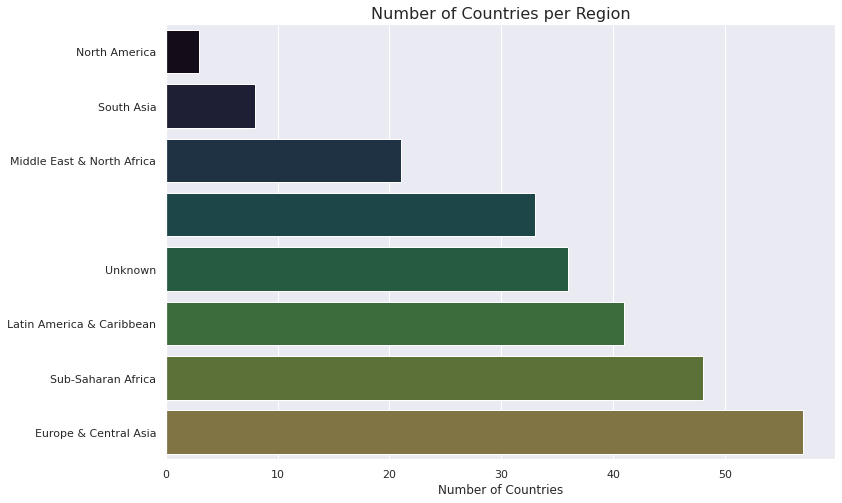

In [11]:
# Visualing number of countries per region
regions['Region'][4] = 'Unknown'
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette('cubehelix',16)
ax = sns.barplot(x="Num_countries", y="Region", data=regions, palette=colors)
ax.set(xlabel='Number of Countries',ylabel=None)
ax.set_title('Number of Countries per Region', fontsize = 16)
for ax in fig.axes:
    for label in ax.get_yticklabels():
        label.set_rotation(0)

### Question: How many different indicators do countries have in 2014? Limit to top 20.

In [12]:
# Top 20 countries that have the most number of indicators in 2014
top20_ind = pd.read_sql("""SELECT CountryName,COUNT(DISTINCT IndicatorName) AS Num_ind
               FROM Indicators
               WHERE Year = 2014
               GROUP BY CountryName
               ORDER BY 2 DESC
               LIMIT 20;""", conn)
top20_ind

,CountryName,Num_ind
0,Turkey,717
1,South Africa,701
2,"Macedonia, FYR",701
3,Romania,696
4,Bulgaria,694
...,...,...
15,Senegal,651
16,Nicaragua,651
17,Bolivia,650
18,Malaysia,649


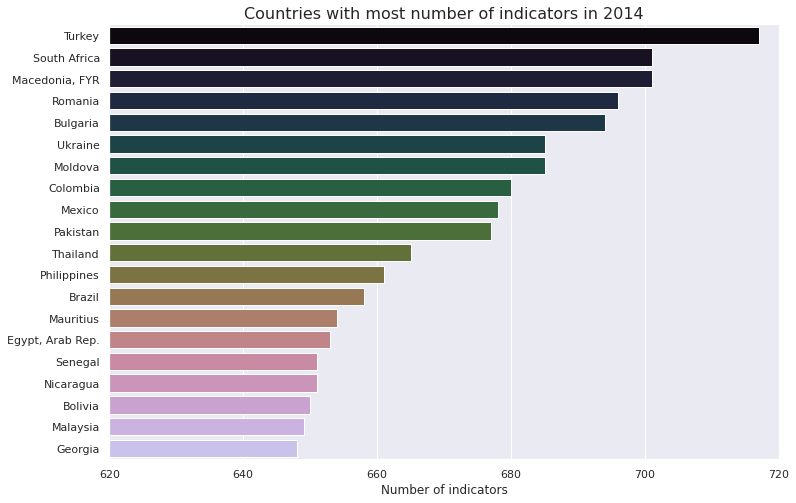

In [13]:
# Visualising top 20 contries
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette('cubehelix',25)
ax = sns.barplot(x="Num_ind", y="CountryName", data=top20_ind, palette=colors)
ax.set(xlabel='Number of indicators',ylabel=None)
ax.set_title('Countries with most number of indicators in 2014', fontsize = 16)
ax.set(xlim=(620, 720))
for ax in fig.axes:
    for label in ax.get_yticklabels():
        label.set_rotation(0)

### Question: What are the 10 smallest countries by population in 2014?

In [14]:
# Countries with the 10 smallest populations in 2014
smallest_count = pd.read_sql("""SELECT CountryName, Value AS Population, Year
                           FROM Indicators
                           WHERE IndicatorName = 'Population, total'
                           AND Year = 2014
                           ORDER BY Value ASC
                           LIMIT 10;""",conn)
smallest_count

,CountryName,Population,Year
0,Tuvalu,9893,2014
1,Palau,21097,2014
2,St. Martin (French part),31530,2014
3,San Marino,31595,2014
4,Turks and Caicos Islands,33740,2014
5,Liechtenstein,37286,2014
6,Monaco,37623,2014
7,Sint Maarten (Dutch part),37664,2014
8,Faeroe Islands,48221,2014
9,Marshall Islands,52898,2014


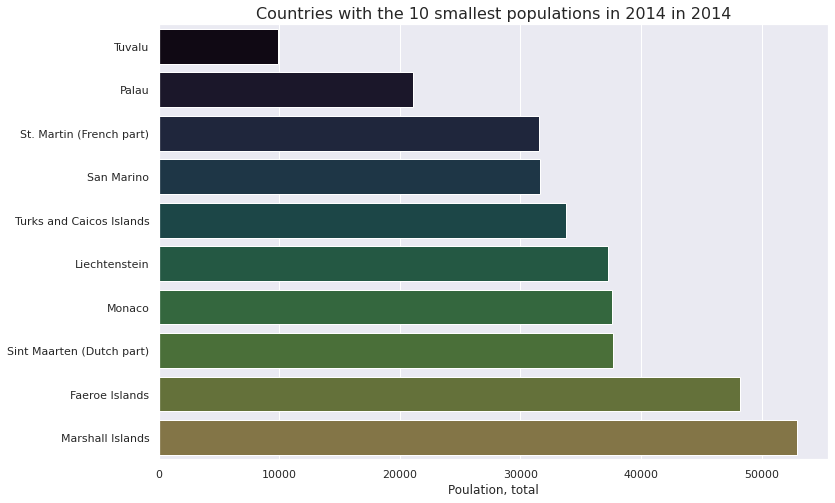

In [15]:
# Visualising countries with the 10 smallest populations in 2014
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette('cubehelix',20)
ax = sns.barplot(x="Population", y="CountryName", data=smallest_count, palette=colors)
ax.set(xlabel='Poulation, total',ylabel=None)
ax.set_title('Countries with the 10 smallest populations in 2014 in 2014', fontsize = 16)
for ax in fig.axes:
    for label in ax.get_yticklabels():
        label.set_rotation(0)

### Question: What are the countries with the highest GDP per capita per year from 2000 to 2014?

In [16]:
# Country with the highest GDP per capita per year from 2000-2014
highest_gdp_per_year = pd.read_sql("""SELECT CountryName, Year, MAX (Value) AS GDP_per_capita
                                       FROM Indicators
                                       WHERE IndicatorName = 'GDP per capita (current US$)'
                                       AND Year >= 2000
                                       GROUP BY Year
                                       ORDER BY Year;""",conn)
highest_gdp_per_year

,CountryName,Year,GDP_per_capita
0,Monaco,2000,82537.446469
1,Monaco,2001,82542.364441
2,Monaco,2002,89009.220233
3,Monaco,2003,108889.217254
4,Monaco,2004,123289.494121
...,...,...,...
10,Monaco,2010,145221.191568
11,Monaco,2011,163351.646686
12,Liechtenstein,2012,149160.758132
13,Luxembourg,2013,113726.638979


### Question: What are the countries with the 10 highest GDP per capita in 2014?

In [17]:
# Countries with 10 highest GDP per capita in 2014
highest_gdp = pd.read_sql("""SELECT CountryName, Value AS GDP_per_capita
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND Year= 2014
               ORDER BY Value DESC
               LIMIT 10;""",conn)
highest_gdp

,CountryName,GDP_per_capita
0,Luxembourg,116664.262488
1,Norway,97307.421592
2,Qatar,96732.402545
3,"Macao SAR, China",96038.050724
4,Switzerland,85594.326601
5,Australia,61925.496062
6,Denmark,60707.249365
7,Sweden,58938.772748
8,Singapore,56284.578405
9,United States,54629.495168


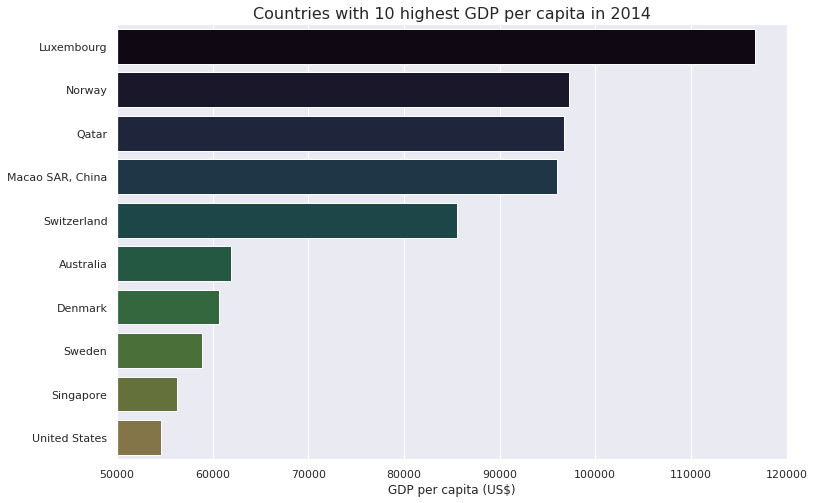

In [18]:
# Visualising results
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette('cubehelix',20)
ax = sns.barplot(x="GDP_per_capita", y="CountryName", data=highest_gdp, palette=colors)
ax.set(xlabel='GDP per capita (US$)',ylabel=None)
ax.set_title('Countries with 10 highest GDP per capita in 2014', fontsize = 16)
ax.set(xlim=(50000, 120000 ))
for ax in fig.axes:
    for label in ax.get_yticklabels():
        label.set_rotation(0)

### Question: What indicators does the dataset have about different types of unemployment?

In [19]:
# Indicator names that include the word 'unemployment'
pd.options.display.max_colwidth = 200
pd.read_sql(""" SELECT IndicatorName
                FROM Indicators
                WHERE IndicatorName LIKE '%unemployment%'
                GROUP BY IndicatorName;""", conn)

,IndicatorName
0,Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)
1,Long-term unemployment (% of total unemployment)
2,"Long-term unemployment, female (% of female unemployment)"
3,"Long-term unemployment, male (% of male unemployment)"
4,Unemployment with primary education (% of total unemployment)
...,...
20,"Unemployment, youth female (% of female labor force ages 15-24) (national estimate)"
21,"Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)"
22,"Unemployment, youth male (% of male labor force ages 15-24) (national estimate)"
23,"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)"


### Question: What are the countries with the 10 highest unemployment rates in 2014?

In [20]:
pd.reset_option("max_colwidth")

# 10 countries with the highest unemployment (% of total labor force) in 2014
high_unemp = pd.read_sql("""SELECT CountryName, Value AS [Unemployment_rate]
               FROM Indicators
               WHERE IndicatorName= 'Unemployment, total (% of total labor force)'
               AND Year= 2014
               ORDER BY Value DESC
               LIMIT 10;""",conn)
high_unemp

,CountryName,Unemployment_rate
0,Mauritania,31.000000
1,Bosnia and Herzegovina,27.900000
2,"Macedonia, FYR",27.900000
3,Greece,26.299999
4,Lesotho,26.200001
5,West Bank and Gaza,26.200001
6,South Africa,25.100000
7,Spain,24.700001
8,Mozambique,22.600000
9,Swaziland,22.299999


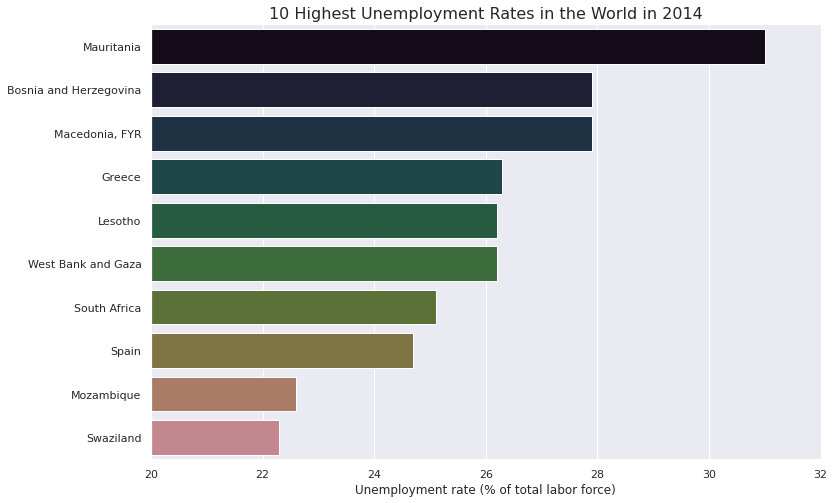

In [21]:
# Visualising results
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette('cubehelix',16)
ax = sns.barplot(x="Unemployment_rate", y="CountryName", data=high_unemp, palette=colors)
ax.set(xlabel='Unemployment rate (% of total labor force)',ylabel=None)
ax.set_title('10 Highest Unemployment Rates in the World in 2014', fontsize = 16)
ax.set(xlim=(20, 32))
for ax in fig.axes:
    for label in ax.get_yticklabels():
        label.set_rotation(0)

# Joining tables, CTEs, subqueries and aggregate functions

### Display long definitions of six CO2-related indicators

In [22]:
# 6 types of CO2 emission exapmles with their long definitions from the Series table
pd.options.display.max_colwidth = 600
pd.read_sql(""" SELECT i.CountryName, i.IndicatorName, s.LongDefinition, i.Year
                FROM Indicators i
                LEFT JOIN Series s
                USING (IndicatorName)
                WHERE i.IndicatorName LIKE 'CO2 emissions%'
                AND CountryName = 'World' AND Year = 2011
                LIMIT 6;""",conn)

,CountryName,IndicatorName,LongDefinition,Year
0,World,CO2 emissions (kg per 2005 US$ of GDP),"Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.",2011
1,World,CO2 emissions (kg per 2011 PPP $ of GDP),"Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.",2011
2,World,CO2 emissions (kg per PPP $ of GDP),"Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.",2011
3,World,CO2 emissions (kt),"Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.",2011
4,World,CO2 emissions (metric tons per capita),"Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.",2011
5,World,"CO2 emissions from electricity and heat production, total (% of total fuel combustion)","CO2 emissions from electricity and heat production is the sum of three IEA categories of CO2 emissions: (1) Main Activity Producer Electricity and Heat which contains the sum of emissions from main activity producer electricity generation, combined heat and power generation and heat plants. Main activity producers (formerly known as public utilities) are defined as those undertakings whose primary activity is to supply the public. They may be publicly or privately owned. This corresponds to IPCC Source/Sink Category 1 A 1 a. For the CO2 emissions from fuel combustion (summary) file, emiss...",2011


### What is the level of central government debt of European Union member states in 2012?

In [23]:
# Level of central government debt of European Union member states in 2012 (the data on some EU countries is not included in the dataset)

eu_debt = pd.read_sql(""" SELECT CountryName, IndicatorName, Year, Value AS Debt
                FROM Indicators
                WHERE IndicatorName = 'Central government debt, total (% of GDP)'
                AND CountryName IN ("Austria", "Belgium", "Bulgaria", "Croatia", "Republic of Cyprus", "Czech Republic", \
                    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania",\
                    "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden")
                AND Year = 2012
                ORDER BY 4 ASC;""",conn)
eu_debt

,CountryName,IndicatorName,Year,Debt
0,Estonia,"Central government debt, total (% of GDP)",2012,10.147712
1,Bulgaria,"Central government debt, total (% of GDP)",2012,17.202115
2,Luxembourg,"Central government debt, total (% of GDP)",2012,20.146620
3,Latvia,"Central government debt, total (% of GDP)",2012,29.232807
4,Sweden,"Central government debt, total (% of GDP)",2012,35.289758
...,...,...,...,...
16,Ireland,"Central government debt, total (% of GDP)",2012,119.017772
17,Portugal,"Central government debt, total (% of GDP)",2012,123.689265
18,Italy,"Central government debt, total (% of GDP)",2012,127.206046
19,Greece,"Central government debt, total (% of GDP)",2012,166.123768


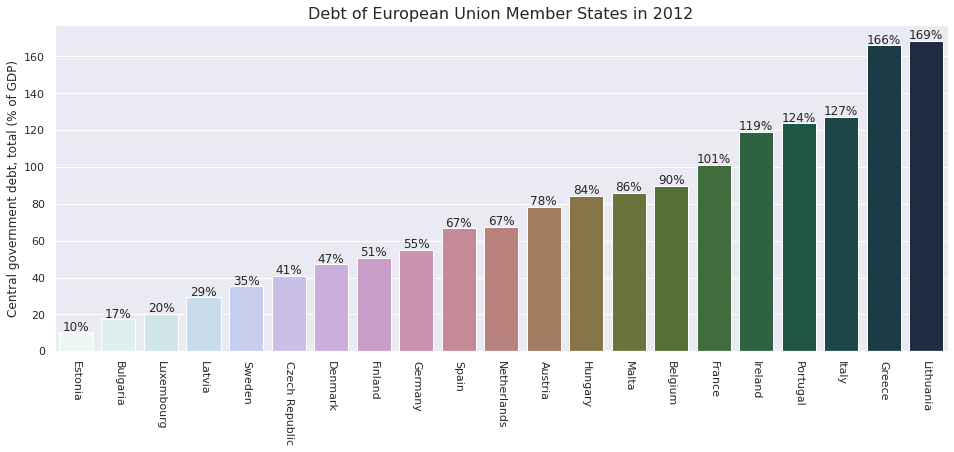

In [24]:
# Visualizing debt of EU member states
fig, ax = plt.subplots(figsize=(16,6))
colors = sns.color_palette('cubehelix_r',24)
ax = sns.barplot(x="CountryName", y="Debt", data=eu_debt, palette=colors)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=-90)
ax.set(ylabel='Central government debt, total (% of GDP)',xlabel=None)
ax.set_title('Debt of European Union Member States in 2012', fontsize = 16)
for ax in fig.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(-90)
for p in ax.patches: # displaying percentages
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+1, '{:.0f}%'.format(height), horizontalalignment='center', fontsize=12) 
      

### Question: What is the individual level and the average level of CO2 emissions per capita by European and Central Asian countries?

In [25]:
# European and Central Asian countries' level of CO2 emission per capita and their average CO2 emission
eu_central_asia_co2 = pd.read_sql(""" WITH co2_levels AS (
                                        SELECT i.CountryName, i.Value AS CO2
                                        FROM Indicators i
                                        LEFT JOIN Country c
                                        ON i.CountryCode = c.CountryCode
                                        WHERE c.Region = 'Europe & Central Asia'
                                        AND i.IndicatorName = 'CO2 emissions (metric tons per capita)'
                                        AND i.Year = 2011
                                        ORDER BY 2),

                                        avg_level AS (             
                                        SELECT AVG(CO2) AS Average_CO2
                                        FROM co2_levels)

                                      SELECT c.CountryName, c.CO2, Average_CO2, 
                                      CASE
                                          WHEN c.CO2 > a.Average_CO2 THEN 'Yes'
                                          WHEN c.CO2 < a.Average_CO2 THEN 'No'
                                          WHEN c.CO2 = a.Average_CO2 THEN 'Average'
                                      END AS Is_over_avg
                                      FROM co2_levels c, avg_level a;""",conn)
eu_central_asia_co2

,CountryName,CO2,Average_CO2,Is_over_avg
0,Tajikistan,0.358948,6.790888,No
1,Kyrgyz Republic,1.199592,6.790888,No
2,Moldova,1.398822,6.790888,No
3,Liechtenstein,1.405096,6.790888,No
4,Albania,1.607038,6.790888,No
...,...,...,...,...
47,Greenland,12.440341,6.790888,Yes
48,Russian Federation,12.647328,6.790888,Yes
49,Estonia,14.049883,6.790888,Yes
50,Kazakhstan,15.810098,6.790888,Yes


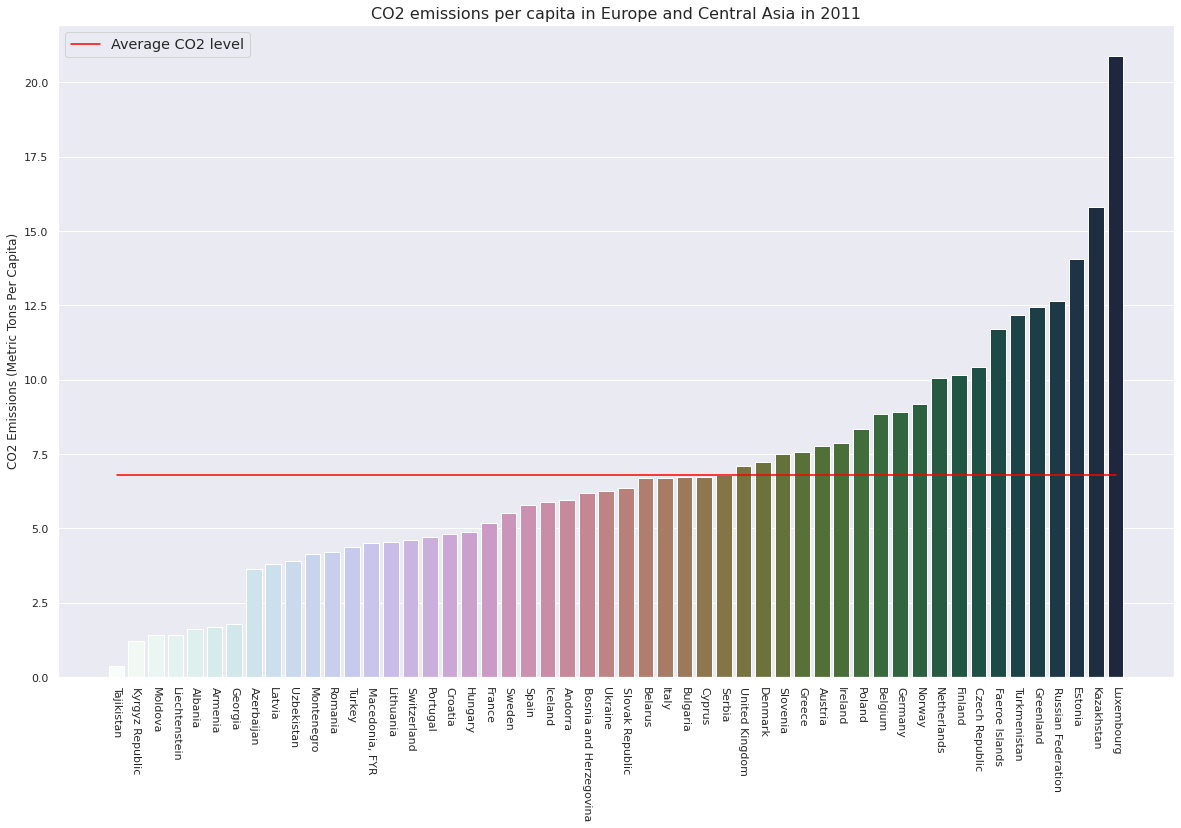

In [26]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(20,12))
colors = sns.color_palette('cubehelix_r',60)
ax = sns.barplot(x="CountryName", y="CO2", data=eu_central_asia_co2,palette=colors)
ax = sns.lineplot(x="CountryName", y="Average_CO2", data=eu_central_asia_co2, label = 'Average CO2 level',color='red')
ax.set_xticklabels(ax.get_xticklabels(),rotation=-90)
ax.set(ylabel='CO2 Emissions (Metric Tons Per Capita)',xlabel=None)
ax.legend(fontsize='large')
ax.set_title('CO2 emissions per capita in Europe and Central Asia in 2011', fontsize = 16)
for ax in fig.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(-90)


#### Question: Which countries are above the average CO2 emission in Europe and Central Asia?

In [27]:
# European and Central Asian countries above average CO2 level in 2011 using CTEs (Common Table Expression)

pd.read_sql(""" WITH cte_co2_levels AS (
                    SELECT i.CountryName, i.Value AS CO2
                    FROM Indicators i
                    LEFT JOIN Country c
                    ON i.CountryCode = c.CountryCode
                    WHERE c.Region = 'Europe & Central Asia'
                    AND i.IndicatorName = 'CO2 emissions (metric tons per capita)'
                    AND i.Year = 2011
                    ORDER BY 2),

                    cte_avg_level AS (             
                    SELECT AVG(CO2) AS Average_CO2
                    FROM cte_co2_levels)

                 SELECT c.CountryName, c.CO2
                 FROM cte_co2_levels c, cte_avg_level a
                 WHERE c.CO2 > a.Average_CO2;""",conn)

,CountryName,CO2
0,Serbia,6.799115
1,United Kingdom,7.085732
2,Denmark,7.248329
3,Slovenia,7.504260
4,Greece,7.556058
...,...,...
16,Greenland,12.440341
17,Russian Federation,12.647328
18,Estonia,14.049883
19,Kazakhstan,15.810098


### Question: What is the number of different indicators per year for Germany?

In [28]:
ger_ind_per_year = pd.read_sql("""  SELECT Year, COUNT(*) AS num_ind
                                    FROM Indicators
                                    WHERE CountryName = 'Germany'
                                    GROUP BY Year;""",conn)
ger_ind_per_year

,Year,num_ind
0,1960,84
1,1961,96
2,1962,110
3,1963,106
4,1964,108
...,...,...
51,2011,736
52,2012,722
53,2013,657
54,2014,466


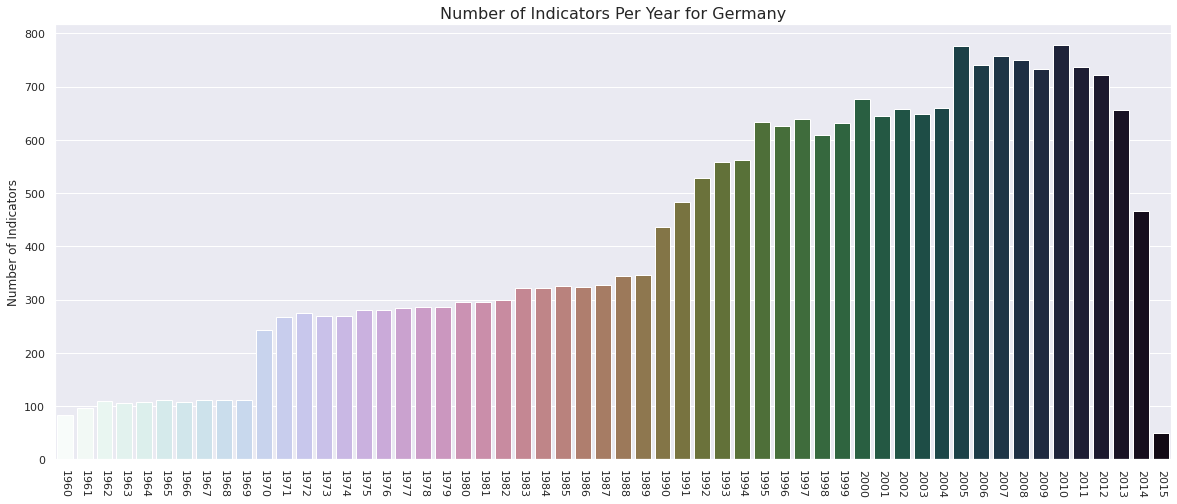

In [29]:
# Visualizing indicators for Germany
fig, ax = plt.subplots(figsize=(20,8))
colors = sns.color_palette('cubehelix_r',58)
sns.barplot(x="Year", y="num_ind", data=ger_ind_per_year,palette=colors)
ax.set(ylabel='Number of Indicators',xlabel=None)
ax.set_title('Number of Indicators Per Year for Germany', fontsize = 16)
for ax in fig.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(-90)

### Question: How many indicators are "lost", i.e. <span style="color:red">not</span> included about Germany in 2014 that were included in 2013?

In [30]:
# Number of indicators present in 2013 but not present in 2014
pd.read_sql(""" WITH cte_ger_2013 AS (
                    SELECT *
                    FROM Indicators
                    WHERE CountryName = 'Germany' AND Year = 2013
                    ),

                    cte_ger_2014 AS (
                    SELECT *
                    FROM Indicators
                    WHERE CountryName = 'Germany' AND Year = 2014)
                
                SELECT COUNT(*) AS Num_ind
                FROM cte_ger_2013 g_13
                LEFT JOIN cte_ger_2014 g_14
                USING (IndicatorName)
                WHERE g_14.Value IS NULL;""", conn)

,Num_ind
0,208


**Answer:** there are 208 indicators "lost" from 2013 to 2014 about Germany. 

### Question: What is the distribution of land area of South Asian countries?

In [31]:
# Saving land area of countries in South Asia
land_south_asia = pd.read_sql(""" SELECT i.CountryName, i.Value
                                    FROM Indicators i
                                    LEFT JOIN Country c
                                    USING (CountryCode)
                                    WHERE c.Region = 'South Asia'
                                    AND i.IndicatorName = 'Land area (sq. km)'
                                    AND i.Year = 2010
                                    ORDER BY 2;""",conn)
land_south_asia

,CountryName,Value
0,Maldives,300
1,Bhutan,38117
2,Sri Lanka,62710
3,Bangladesh,130170
4,Nepal,143350
5,Afghanistan,652860
6,Pakistan,770880
7,India,2973190


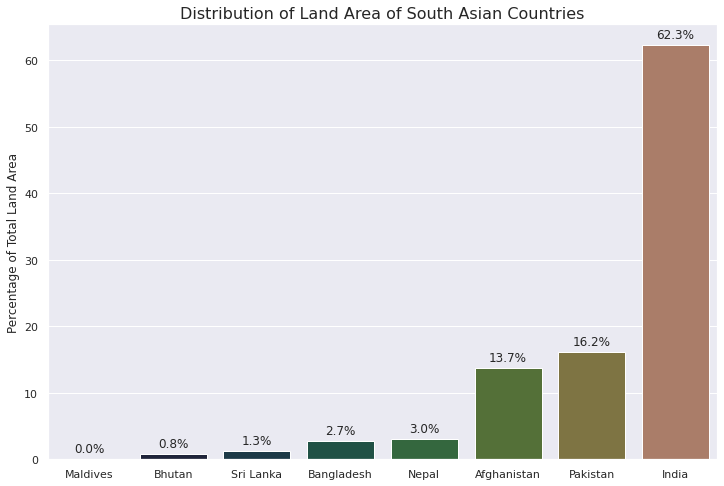

In [32]:
# Visualizing the distribution of land area by country in South Asia
land_south_asia['land_percent'] = round(land_south_asia.Value / land_south_asia.Value.sum() * 100,1)
fig, ax = plt.subplots(figsize=(12,8))
colors=sns.color_palette('cubehelix',14)
sns.barplot(x="CountryName", y="land_percent", data=land_south_asia,palette=colors)
ax.set(ylabel='Percentage of Total Land Area',xlabel=None)
ax.set_title('Distribution of Land Area of South Asian Countries', fontsize = 16)
for p in ax.patches: # displaying percentages
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+1, '{:.1f}%'.format(height), horizontalalignment='center', fontsize=12) 